In [2]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sb
from scipy import stats
from scipy.stats import norm

In [3]:
dataset = pd.read_csv("weatherAUS.csv", sep=',')

# Paso 2: Comprender Datos

## Cantidad de datos

In [4]:
print(dataset.shape)

(142193, 24)


In [5]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Analizar graficos para encontrar relaciones

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

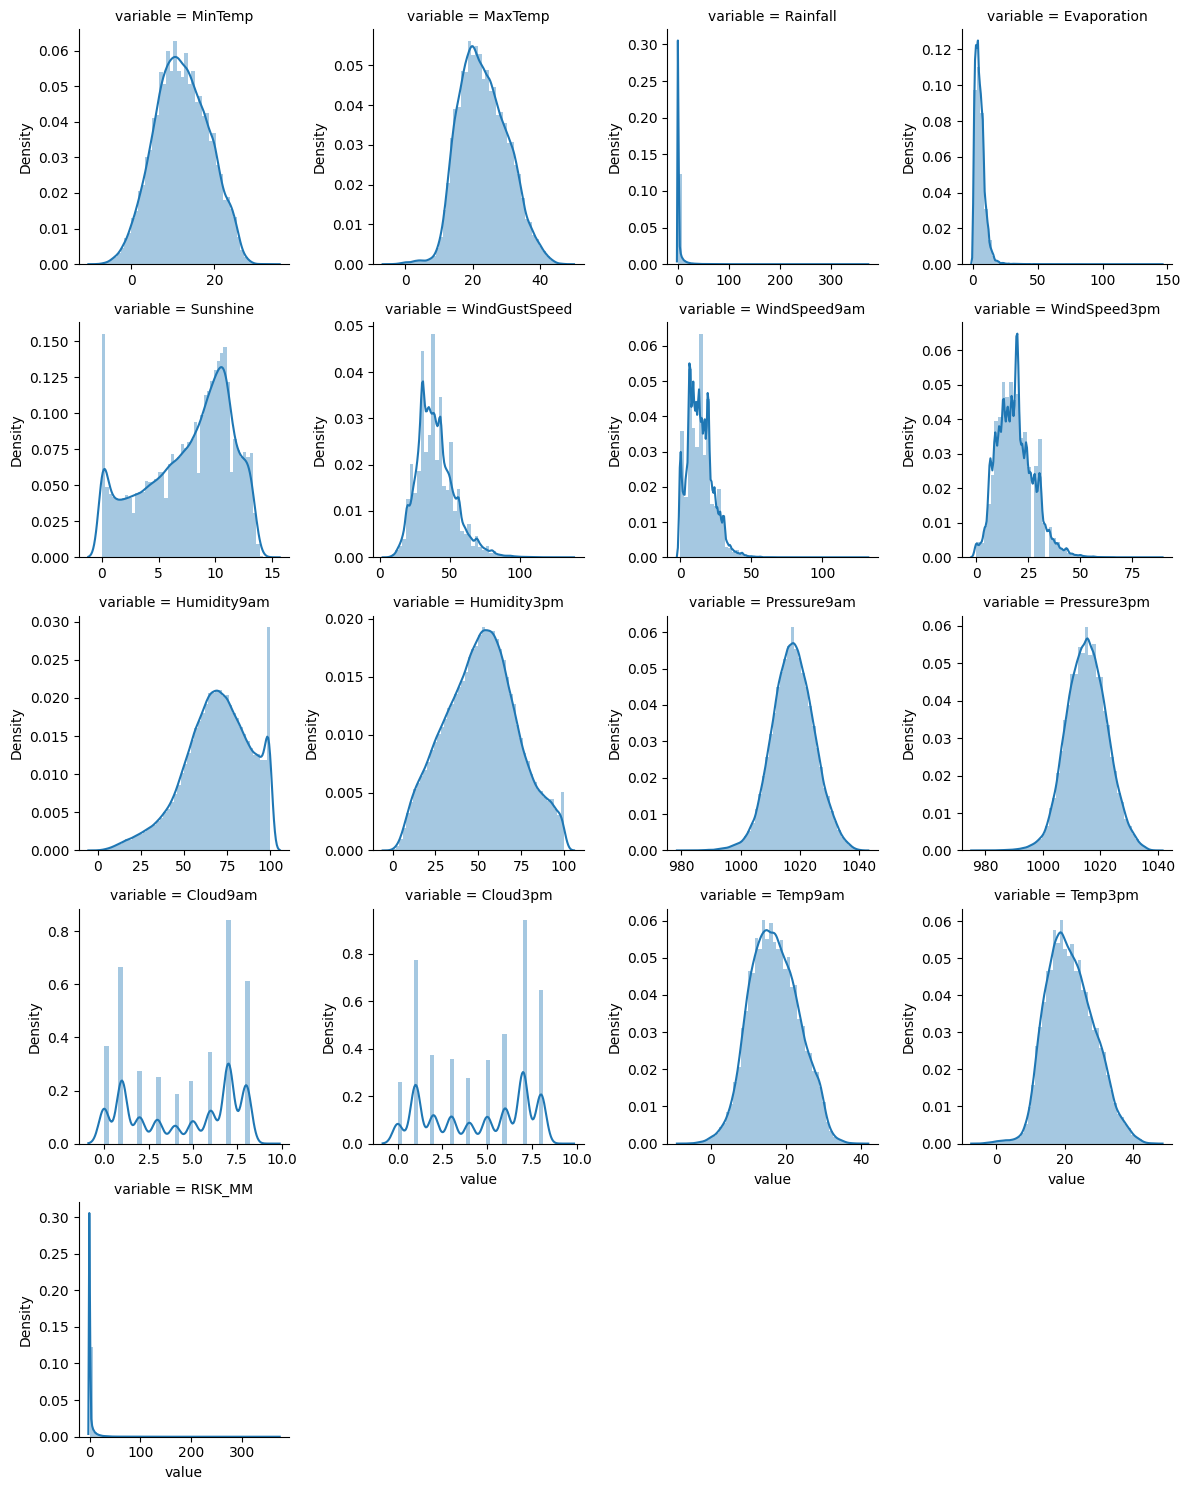

In [6]:
#create numeric plots of test
num = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
nd = pd.melt(dataset, value_vars = num)
n1 = sb.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sb.distplot, 'value')
n1

## Cantidad de datos faltantes numericas y categoricas

In [7]:
dataset.select_dtypes(exclude=['object']).isna().sum().where(lambda x: x>0).dropna()

MinTemp            637.0
MaxTemp            322.0
Rainfall          1406.0
Evaporation      60843.0
Sunshine         67816.0
WindGustSpeed     9270.0
WindSpeed9am      1348.0
WindSpeed3pm      2630.0
Humidity9am       1774.0
Humidity3pm       3610.0
Pressure9am      14014.0
Pressure3pm      13981.0
Cloud9am         53657.0
Cloud3pm         57094.0
Temp9am            904.0
Temp3pm           2726.0
dtype: float64

In [8]:
dataset.select_dtypes(include=['object']).isna().sum().where(lambda x: x>0).dropna()

WindGustDir     9330.0
WindDir9am     10013.0
WindDir3pm      3778.0
RainToday       1406.0
dtype: float64

## Informacion de la columnas

In [9]:
print(dataset.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Intentando comprender evaporation

Ya que Evaporation, Sunshine, Cloud9am y Cloud3pm tienen tantos datos nulos se pude llegar a pensar que por ejemplo que haya un nulo en evaporation significa que no hubo algo con esta carecteriscas

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


pero al saber que el minimo en 0, significa que estos datos realmente estan vacios.

## Ver datos respecto a variable a predecir

### RainTommorrow

hay que cambiar la variable a predecir con valores númericos para ver como estan relacionados los valores númericos respecto a esta.

In [12]:
numericos = dataset.select_dtypes(exclude=['object'])
columna_especifica = dataset['RainTomorrow']

datos_completos = pd.concat([numericos, columna_especifica], axis=1)

In [13]:
datos_completos.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [14]:
datos_completos['RainTomorrow'] = datos_completos['RainTomorrow'].replace({'No': 0, 'Yes': 1})

In [15]:
datos_completos.RainTomorrow

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int64

In [16]:
corr_matrix = datos_completos.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
RISK_MM          0.501485
Humidity3pm      0.446160
Cloud3pm         0.381870
Cloud9am         0.317380
Humidity9am      0.257161
Rainfall         0.239032
WindGustSpeed    0.234010
WindSpeed9am     0.090995
WindSpeed3pm     0.087817
MinTemp          0.083936
Temp9am         -0.025691
Evaporation     -0.119285
MaxTemp         -0.159237
Temp3pm         -0.192424
Pressure3pm     -0.226031
Pressure9am     -0.246371
Sunshine        -0.450768
Name: RainTomorrow, dtype: float64

## Mapa de calor

<Axes: >

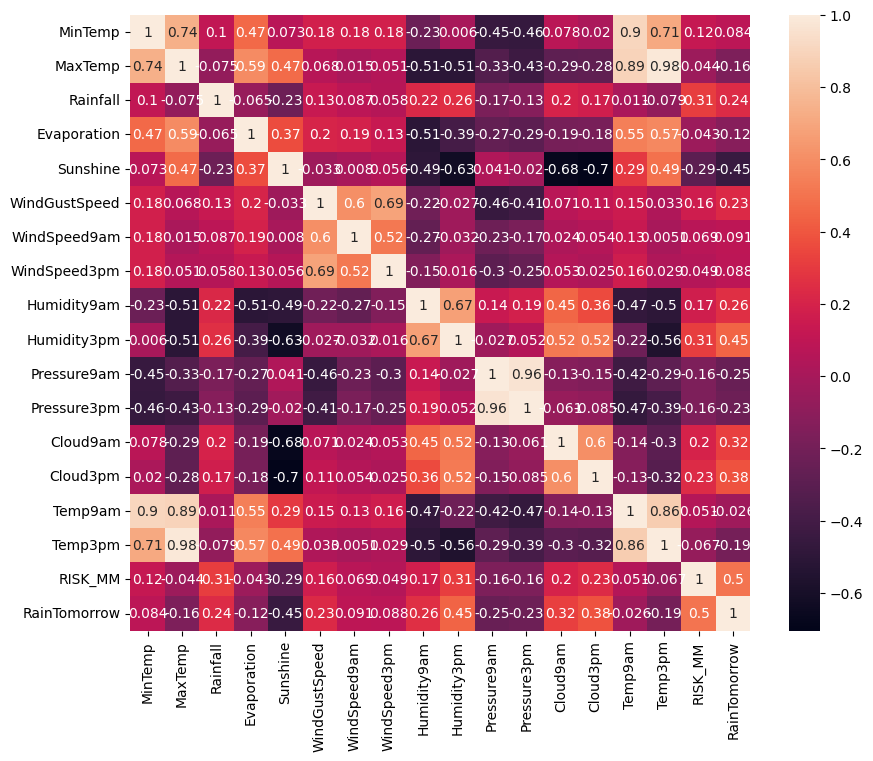

In [17]:
corr = datos_completos.corr()
sb.heatmap(corr, annot=True)

### RiskMM

In [18]:
corr_matrix = datos_completos.corr()
corr_matrix["RISK_MM"].sort_values(ascending=False)

RISK_MM          1.000000
RainTomorrow     0.501485
Humidity3pm      0.313183
Rainfall         0.308557
Cloud3pm         0.234814
Cloud9am         0.198095
Humidity9am      0.172417
WindGustSpeed    0.162923
MinTemp          0.124743
WindSpeed9am     0.069404
Temp9am          0.051232
WindSpeed3pm     0.049240
Evaporation     -0.043498
MaxTemp         -0.044208
Temp3pm         -0.066817
Pressure9am     -0.163673
Pressure3pm     -0.164184
Sunshine        -0.294973
Name: RISK_MM, dtype: float64

## datos atipicos

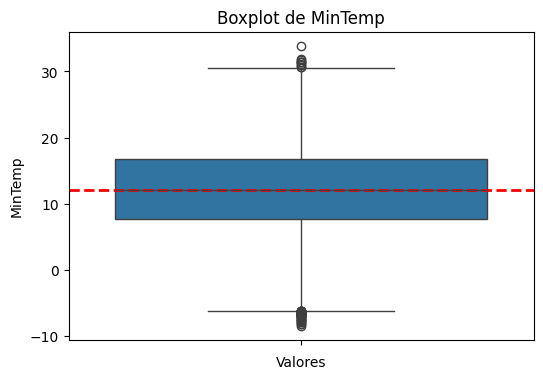

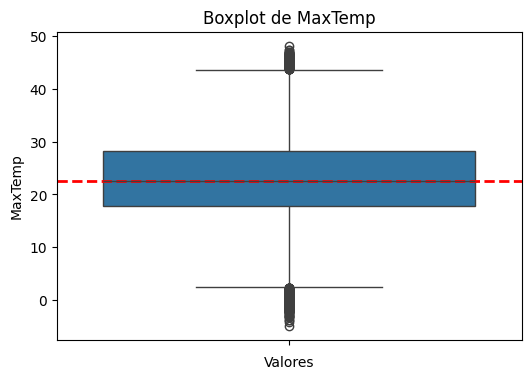

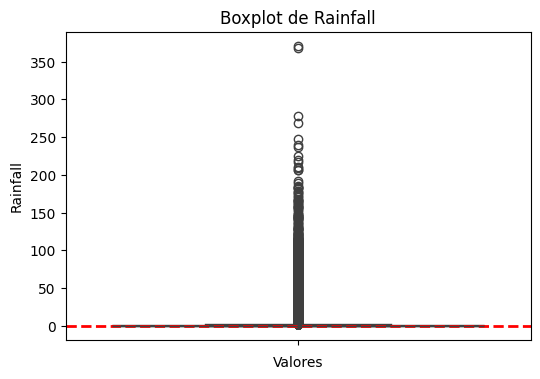

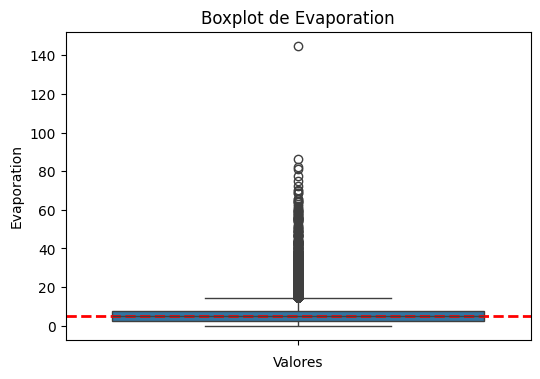

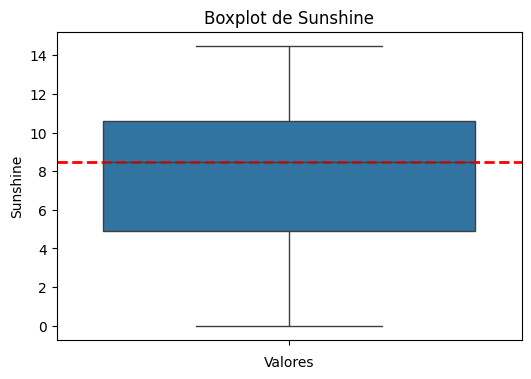

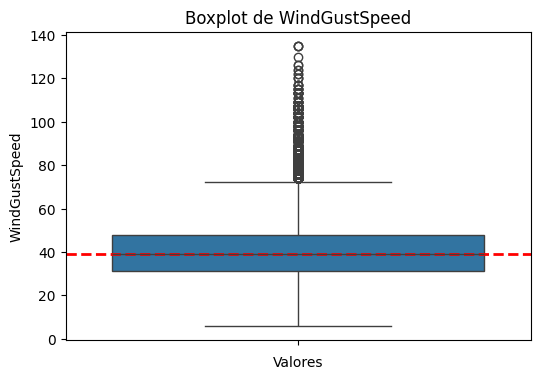

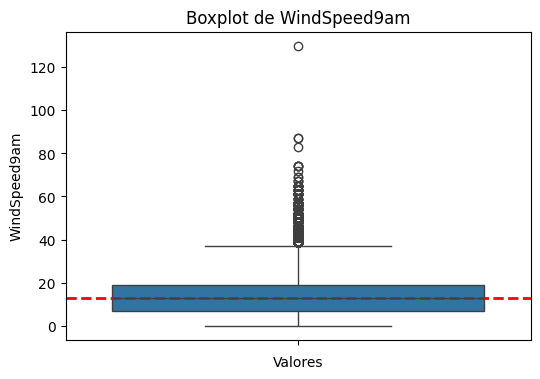

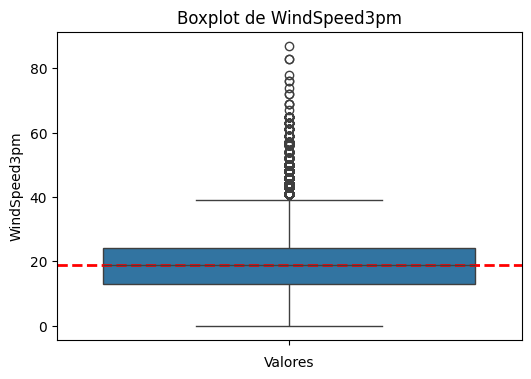

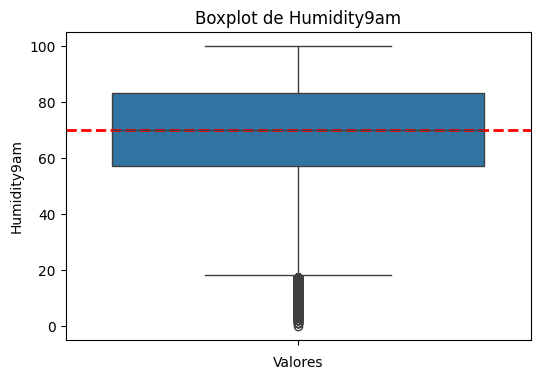

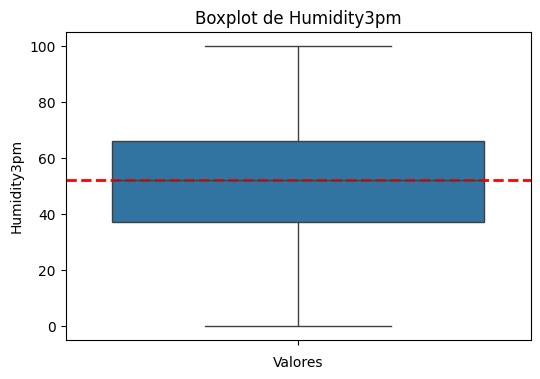

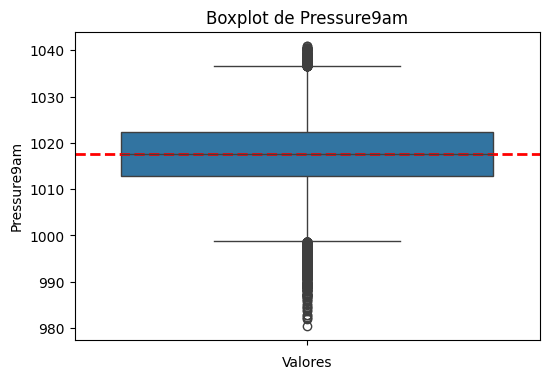

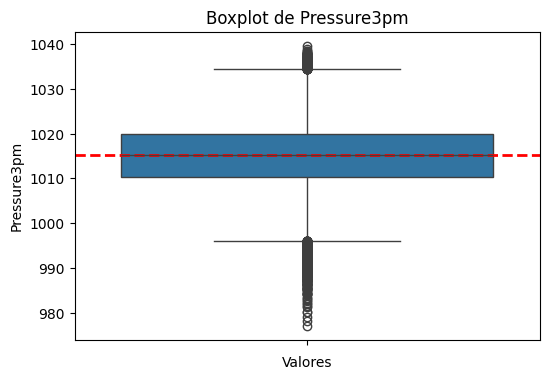

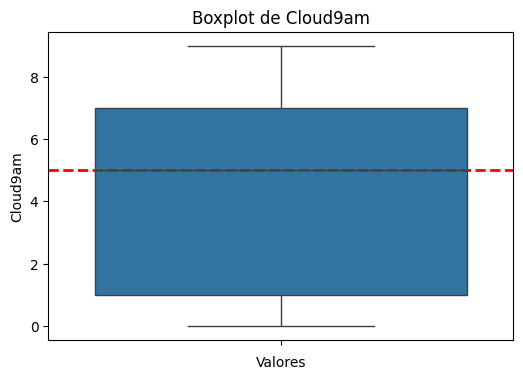

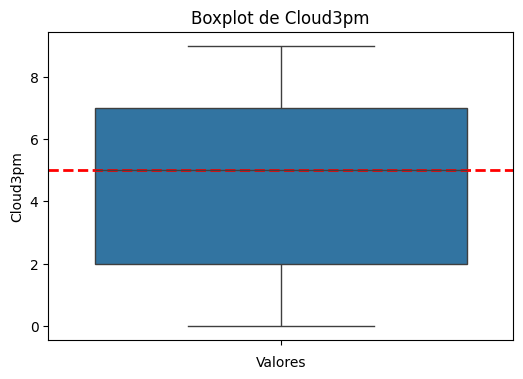

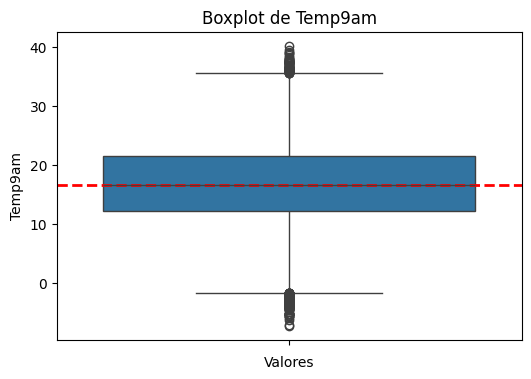

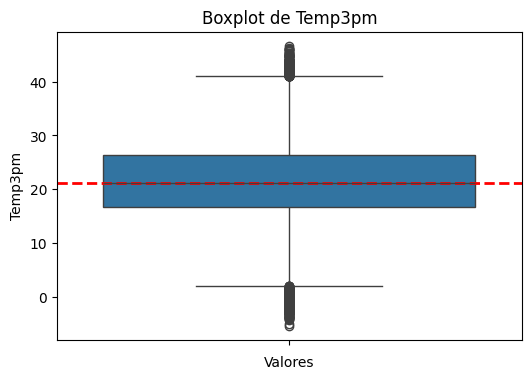

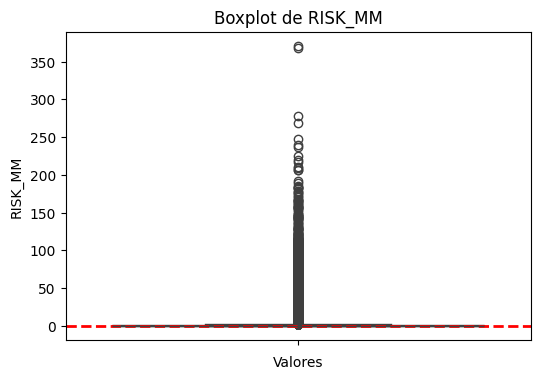

In [19]:
# Seleccionar solo las columnas numéricas
columnas_numericas = dataset.select_dtypes(include=['float64', 'int64'])

# Calcular la mediana de cada columna numérica
medianas = columnas_numericas.median()

# Crear un gráfico para cada columna numérica
for columna in columnas_numericas.columns:
    plt.figure(figsize=(6, 4))  # Tamaño del gráfico
    sb.boxplot(data=dataset[columna])
    plt.axhline(y=medianas[columna], color='red', linestyle='dashed', linewidth=2)  # Mediana
    plt.title(f'Boxplot de {columna}')
    plt.xlabel('Valores')
    plt.ylabel(columna)
    plt.xticks(rotation=45)
    plt.show()


# Paso 3:Preparar los datos

revisamos los datos nulos para empezar a trabajar en ellos

In [20]:
dataset.select_dtypes(exclude=['object']).isna().sum().where(lambda x: x>0).dropna()

MinTemp            637.0
MaxTemp            322.0
Rainfall          1406.0
Evaporation      60843.0
Sunshine         67816.0
WindGustSpeed     9270.0
WindSpeed9am      1348.0
WindSpeed3pm      2630.0
Humidity9am       1774.0
Humidity3pm       3610.0
Pressure9am      14014.0
Pressure3pm      13981.0
Cloud9am         53657.0
Cloud3pm         57094.0
Temp9am            904.0
Temp3pm           2726.0
dtype: float64

In [21]:
dataset.select_dtypes(include=['object']).isna().sum().dropna()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

hacemos una copia del dataframe y reemplazmos la columna date en 3 columnas distintas, que representan el año, el mes y el dia

In [22]:
dataset_mod = dataset.copy()

## Separar las fechas

In [23]:
dataset_mod['Date'] = pd.to_datetime(dataset_mod['Date'])

dataset_mod['año'] = dataset_mod['Date'].dt.year
dataset_mod['mes'] = dataset_mod['Date'].dt.month
dataset_mod['dia'] = dataset_mod['Date'].dt.day

dataset_mod = dataset_mod.drop('Date',axis=1)

## Tratar los datos atipicos

aqui vamos a ver a partir de cuales números se podrian considerar datos atipicos, los que estan por encima del limite superior fueron reemplazados por la mediana y los que estaban por debajo del limite inferior fueron reemplazados por la moda

In [24]:
# Calcular el rango intercuartil (IQR) para cada columna numérica
Q1 = dataset_mod.select_dtypes(exclude=['object']).dropna().quantile(0.25)
Q3 = dataset_mod.select_dtypes(exclude=['object']).dropna().quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior para identificar los valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar valores atípicos para cada columna
for columna in dataset_mod.select_dtypes(exclude=['object']).columns:
  try:
      valores_atipicos_inf = dataset_mod[(dataset_mod[columna] > limite_superior[columna])][columna]
      valores_atipicos_sup = dataset_mod[(dataset_mod[columna] < limite_inferior[columna])][columna]

      per_out = (len(valores_atipicos_inf) + len(valores_atipicos_sup)) * 100 / len(dataset_mod[columna])

      valores_atipicos_inf = valores_atipicos_inf.tolist()
      valores_atipicos_sup = valores_atipicos_sup.tolist()

      abs_min_inf = min(abs(num) for num in valores_atipicos_inf)
      abs_min_sup = min(abs(numero) for numero in valores_atipicos_sup)

      numeros_cercanos_a_cero_inf = [num for num in valores_atipicos_inf if abs(num) == abs_min_inf]
      numeros_cercanos_a_cero_sup = [numero for numero in valores_atipicos_sup if abs(numero) == abs_min_sup]

      print(f"Valores atípicos en '{columna}': {set(numeros_cercanos_a_cero_inf), set(numeros_cercanos_a_cero_sup)}, esto representa {round(per_out,2)}% de la columna")

      # Reemplazar los datos atipicos mayores al limite superior por la mediana
      mediana_columna = dataset_mod[columna].median()
      dataset_mod.loc[dataset_mod[columna] > limite_superior[columna], columna] = mediana_columna

      #Reemplazar los datos atipicos menores al limite inferior por la media
      media_columna = dataset_mod[columna].mean()
      dataset_mod.loc[dataset_mod[columna] < limite_inferior, columna] = media_columna
  except:
    continue

Valores atípicos en 'MinTemp': ({33.9}, {-6.5}), esto representa 0.03% de la columna
Valores atípicos en 'MaxTemp': ({46.2}, {0.0}), esto representa 0.2% de la columna
Valores atípicos en 'Pressure9am': ({1036.0}, {980.5}), esto representa 0.97% de la columna
Valores atípicos en 'Pressure3pm': ({1033.7}, {977.1}), esto representa 0.76% de la columna
Valores atípicos en 'Temp9am': ({38.9}, {-2.6}), esto representa 0.07% de la columna
Valores atípicos en 'Temp3pm': ({43.6}, {0.0}), esto representa 0.26% de la columna


Revisamos si aún quedan datos atipicos

In [25]:
# Identificar valores atípicos para cada columna
for columna in dataset_mod.select_dtypes(exclude=['object']).columns:
  try:
      valores_atipicos_inf = dataset_mod[(dataset_mod[columna] > limite_superior[columna])][columna]
      valores_atipicos_sup = dataset_mod[(dataset_mod[columna] < limite_inferior[columna])][columna]

      per_out = (len(valores_atipicos_inf) + len(valores_atipicos_sup)) * 100 / len(dataset_mod[columna])

      valores_atipicos_inf = valores_atipicos_inf.tolist()
      valores_atipicos_sup = valores_atipicos_sup.tolist()

      abs_min_inf = min(abs(num) for num in valores_atipicos_inf)
      abs_min_sup = min(abs(numero) for numero in valores_atipicos_sup)

      numeros_cercanos_a_cero_inf = [num for num in valores_atipicos_inf if abs(num) == abs_min_inf]
      numeros_cercanos_a_cero_sup = [numero for numero in valores_atipicos_sup if abs(numero) == abs_min_sup]

      print(f"Valores atípicos en '{columna}': {set(numeros_cercanos_a_cero_inf), set(numeros_cercanos_a_cero_sup)}, esto representa {round(per_out,2)}% de la columna")
  except:
    print(f'Columna {columna} no tiene valores atipicos')

Columna MinTemp no tiene valores atipicos
Columna MaxTemp no tiene valores atipicos
Columna Rainfall no tiene valores atipicos
Columna Evaporation no tiene valores atipicos
Columna Sunshine no tiene valores atipicos
Columna WindGustSpeed no tiene valores atipicos
Columna WindSpeed9am no tiene valores atipicos
Columna WindSpeed3pm no tiene valores atipicos
Columna Humidity9am no tiene valores atipicos
Columna Humidity3pm no tiene valores atipicos
Columna Pressure9am no tiene valores atipicos
Columna Pressure3pm no tiene valores atipicos
Columna Cloud9am no tiene valores atipicos
Columna Cloud3pm no tiene valores atipicos
Columna Temp9am no tiene valores atipicos
Columna Temp3pm no tiene valores atipicos
Columna RISK_MM no tiene valores atipicos
Columna año no tiene valores atipicos
Columna mes no tiene valores atipicos
Columna dia no tiene valores atipicos


## Rellenar datos númericos

1.   MinTemp, MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm> normal
2.   Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm> no normal

In [26]:
#Reemplazando los datos vacios que tienen una distribucion normal con la media
dataset_mod['MinTemp'].fillna(dataset_mod['MinTemp'].mean(), inplace=True)
dataset_mod['MaxTemp'].fillna(dataset_mod['MaxTemp'].mean(), inplace=True)
dataset_mod['Pressure9am'].fillna(dataset_mod['Pressure9am'].mean(), inplace=True)
dataset_mod['Pressure3pm'].fillna(dataset_mod['Pressure3pm'].mean(), inplace=True)
dataset_mod['Temp9am'].fillna(dataset_mod['Temp9am'].mean(), inplace=True)
dataset_mod['Temp3pm'].fillna(dataset_mod['Temp3pm'].mean(), inplace=True)

#Reemplazando los datos vacios que tienen una distribución no normal con la mediana
dataset_mod['Rainfall'].fillna(dataset_mod['Rainfall'].dropna().median(), inplace=True)
dataset_mod['Evaporation'].fillna(dataset_mod['Evaporation'].dropna().median(), inplace=True)
dataset_mod['Sunshine'].fillna(dataset_mod['Sunshine'].dropna().median(), inplace=True)
dataset_mod['WindGustSpeed'].fillna(dataset_mod['WindGustSpeed'].dropna().median(), inplace=True)
dataset_mod['WindSpeed9am'].fillna(dataset_mod['WindSpeed9am'].dropna().median(), inplace=True)
dataset_mod['WindSpeed3pm'].fillna(dataset_mod['WindSpeed3pm'].dropna().median(), inplace=True)
dataset_mod['Humidity9am'].fillna(dataset_mod['Humidity9am'].dropna().median(), inplace=True)
dataset_mod['Humidity3pm'].fillna(dataset_mod['Humidity3pm'].dropna().median(), inplace=True)
dataset_mod['Cloud9am'].fillna(dataset_mod['Cloud9am'].dropna().median(), inplace=True)
dataset_mod['Cloud3pm'].fillna(dataset_mod['Cloud3pm'].dropna().median(), inplace=True)
dataset_mod['RISK_MM'].fillna(dataset_mod['RISK_MM'].dropna().median(), inplace=True)

## Rellenar datos faltantes de los categoricos

cambiamos los categoricos nulos por la moda de estos

In [27]:
nulos_categoricos = dataset.select_dtypes(exclude=['number']).isna().sum().where(lambda x: x>0).dropna()
nulos_categoricos = list(nulos_categoricos.keys())

for columns in nulos_categoricos:
  moda = dataset_mod[columns].mode()[0]
  dataset_mod[columns].fillna(moda, inplace=True)

Revisamos si quedan datos nulos

In [28]:
dataset_mod.select_dtypes(include=['object', 'number']).isna().sum().dropna()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
año              0
mes              0
dia              0
dtype: int64

pasamos los categoricos a numericos

In [29]:
from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()

for columna in dataset_mod.select_dtypes(exclude=['number']):
    dataset_mod[columna] = codificador.fit_transform(dataset_mod[columna])

In [30]:
dataset_mod.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,año,mes,dia
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,8.0,5.0,16.9,21.8,0,0.0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,5.0,5.0,17.2,24.3,0,0.0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,5.0,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,5.0,5.0,18.1,26.5,0,1.0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


revisamos que no queden numericos y que se hayan cambiado correctamente

In [31]:
dataset_mod.select_dtypes(exclude=['number']).sum()

Series([], dtype: float64)

In [32]:
dataset_mod.WindGustDir.unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2,  0, 11])

In [33]:
dataset_mod.WindDir9am.unique()

array([13,  6,  9,  1, 12, 10,  8,  4,  3, 11, 15,  2,  0,  7, 14,  5])

In [34]:
dataset_mod.WindDir3pm.unique()

array([14, 15,  0,  7, 13, 10,  2,  1,  6, 11, 12,  9,  3,  8,  5,  4])

In [35]:
dataset_mod.RainToday.unique()

array([0, 1])

In [36]:
dataset_mod.Location.unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [37]:
dataset_mod.RainTomorrow.unique()

array([0, 1])

revisar las correlaciones ahora que todo esta en numerico

In [38]:
corr_matrix = dataset_mod.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
RISK_MM          0.501485
Humidity3pm      0.439741
RainToday        0.306555
Cloud3pm         0.295054
Humidity9am      0.255292
Cloud9am         0.248829
Rainfall         0.235087
WindGustSpeed    0.224766
WindSpeed9am     0.090446
WindSpeed3pm     0.086973
MinTemp          0.083734
WindGustDir      0.053447
WindDir9am       0.035776
WindDir3pm       0.030488
mes              0.007328
dia              0.005379
Location        -0.003579
año             -0.012039
Temp9am         -0.025521
Evaporation     -0.090406
MaxTemp         -0.159073
Temp3pm         -0.190223
Pressure3pm     -0.214465
Pressure9am     -0.233284
Sunshine        -0.323714
Name: RainTomorrow, dtype: float64

In [39]:
corr_matrix = dataset_mod.corr()
corr_matrix["RISK_MM"].sort_values(ascending=False)

RISK_MM          1.000000
RainTomorrow     0.501485
Humidity3pm      0.306782
Rainfall         0.300183
RainToday        0.214971
Cloud3pm         0.194468
Humidity9am      0.170638
Cloud9am         0.164703
WindGustSpeed    0.156342
MinTemp          0.123940
WindSpeed9am     0.068714
Temp9am          0.050831
WindSpeed3pm     0.048612
WindDir9am       0.004280
dia              0.004264
Location        -0.002788
WindGustDir     -0.006275
año             -0.009062
WindDir3pm      -0.017401
mes             -0.032250
Evaporation     -0.033191
MaxTemp         -0.044075
Temp3pm         -0.065436
Pressure9am     -0.155867
Pressure3pm     -0.156589
Sunshine        -0.219747
Name: RISK_MM, dtype: float64

## PCA

**Raintomorrow**

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = dataset_mod.drop(['RainTomorrow'], axis=1)
y = dataset_mod[['RainTomorrow']]
scaler.fit(df)
X_scaled=scaler.transform(df)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80)
X_pca= pca.fit_transform(X_scaled)

print(f'Cantidad de componentes: {pca.n_components_}')

Cantidad de componentes: 12


In [42]:
print(X_pca.shape)
print(y.shape)

(142193, 12)
(142193, 1)


shape of x_pca (142193, 12)
[0.21096099 0.13989263 0.09242992 0.06205852 0.05073721 0.04812896
 0.04036726 0.03952986 0.03825558 0.036791   0.0330712  0.03172914]


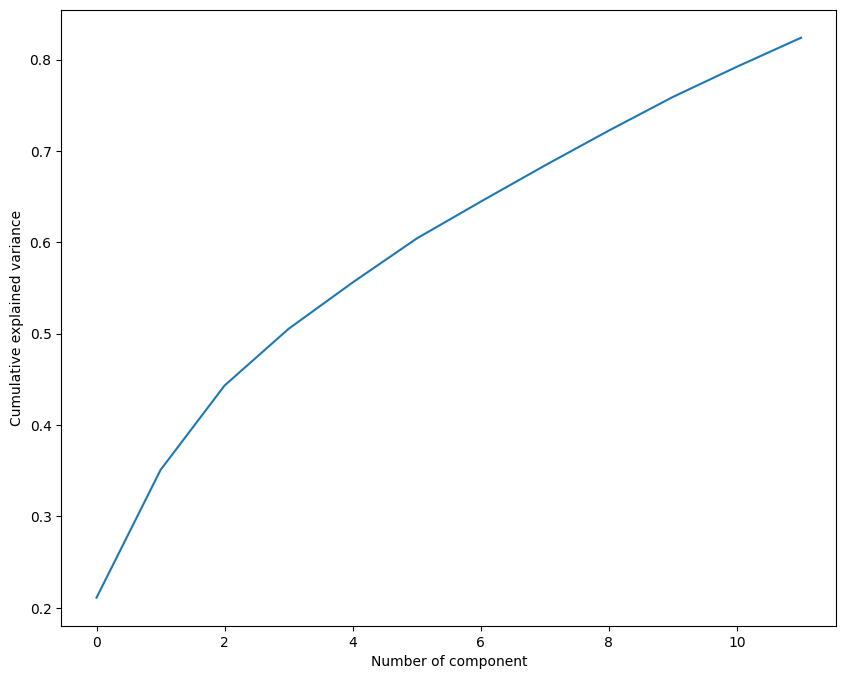

In [43]:
pca.fit(X_scaled)
print('shape of x_pca', X_pca.shape)
expl= pca.explained_variance_ratio_
print(expl)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of component')
plt.ylabel('Cumulative explained variance')
plt.show()

**RISK_MM**

In [44]:
df2 = dataset_mod.drop(['RISK_MM'], axis=1)
y2 = dataset_mod[['RISK_MM']]
scaler.fit(df2)
X_scaled2=scaler.transform(df2)

In [45]:
pca2 = PCA(n_components=0.80)
X_pca2= pca2.fit_transform(X_scaled2)

print(f'Cantidad de componentes: {pca2.n_components_}')

Cantidad de componentes: 12


## Separar en train y test

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [47]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_pca2, y2, test_size=0.2, random_state=42)

# Paso 4: Modelamiento

## Modelo de regresion logistica

In [48]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [49]:
print("R squared of the Linear Regression on training set: {:.2%}".format(logisticRegr.score(x_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(logisticRegr.score(x_test, y_test)))

R squared of the Linear Regression on training set: 91.96%
R squared of the Linear Regression on test set: 91.86%


## Modelo polinomico

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x_train2.reshape(-1, 1))

linreg = LinearRegression()
linreg.fit(x_train2, y_train2)

LinearRegression()

In [51]:
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(x_train2, y_train2)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(x_test2, y_test2)))

R squared of the Linear Regression on training set: 26.45%
R squared of the Linear Regression on test set: 26.68%


# Paso 5: Evaluacion de modelos

## Regresion logistica RainTomorrow


In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [53]:
y_pred = logisticRegr.predict(x_test)

In [54]:
print("Mean Absolute Error of the logistic Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Log Error of the logistic Regression on test set is {:.2%}".format(mean_squared_log_error(y_test,y_pred)))

Mean Absolute Error of the logistic Regression on test set is 0.08
Mean Squared Log Error of the logistic Regression on test set is 3.91%


Podemos ver que es te modelo es bastante efectivo ya que no presentaba sobreentrenamiento, valores separados entre train y test, datos elevados de MSLE o en MAE e incluso tiene una precisión del 92%, pero efectivamente prediciendo mejor los dia que no llueve.

El accurracy de la regresion logistica 0.92%


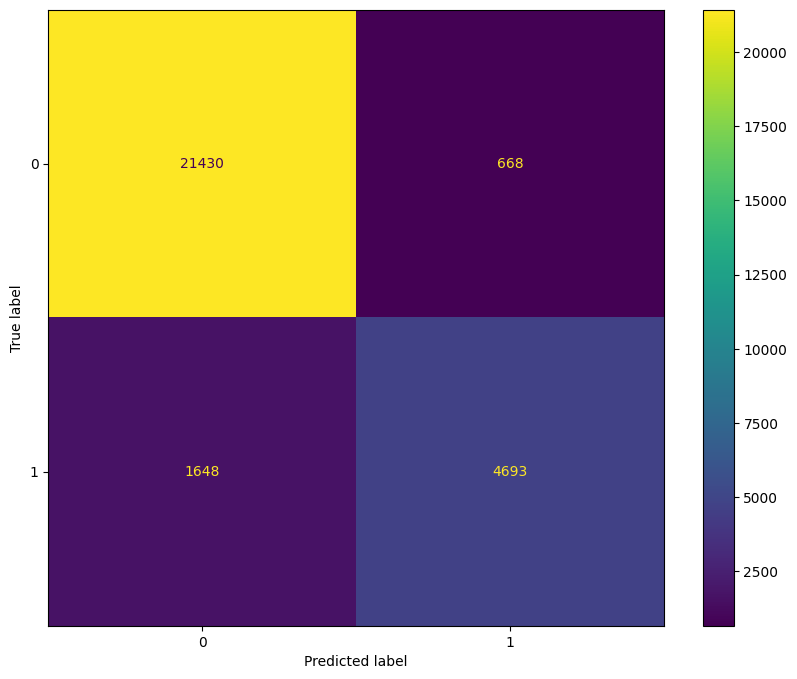

In [56]:
y_test_array = y_test.values.ravel()
y_pred_array = y_pred.ravel()

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

matrix  = confusion_matrix(y_test_array, y_pred_array)
acc = accuracy_score(y_test_array, y_pred_array)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
print(f'El accurracy de la regresion logistica {round(acc,2)}%')
disp.plot()
plt.show()

## Regresion lineal RISKMM

In [57]:
y_pred2 = linreg.predict(x_test)

In [58]:
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test2, y_pred2)))

Mean Absolute Error of the Linear Regression on test set is 3.36


**Este es un mal modelo ya que RISK_MM, que es la cantidad de lluvia, no puede tener valores negativos en los predichos**

In [59]:
print("Mean Squared Log Error of the Linear Regression on test set is {:.2%}".format(mean_squared_log_error(y_test2,y_pred2)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test2, y_pred2)
print(f'{round(r2,2)}')

0.45


dicho anteriormente el modelo es malo ya que su r2 score es igual a 0.45, significa que el modelo representa bien el 45% de la variabilidad de los datos.

acc2


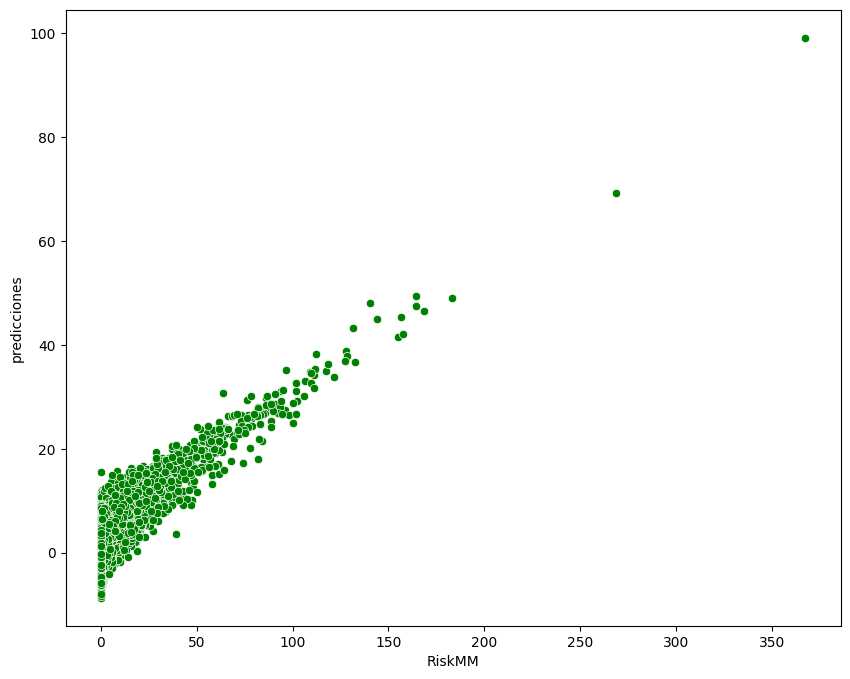

In [61]:
import seaborn as sb
import matplotlib.pyplot as plt

# Convertir los arrays a unidimensionales
y_test_array2 = y_test2.values.ravel()
y_pred_array1d = y_pred2.ravel()

# Crear el gráfico de dispersión
sb.scatterplot(x=y_test_array2 , y=y_pred_array1d, color="green")
plt.xlabel('RiskMM')
plt.ylabel('predicciones')
print('acc2')
plt.show()

In [62]:
d = {"true": y_test_array2, "predicted": y_pred_array1d}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr

,true,predicted,diff
0,4.6,8.382988,3.782988
1,0.0,3.818946,3.818946
2,0.0,-2.383051,-2.383051
3,0.0,0.974066,0.974066
4,14.6,3.738973,-10.861027
...,...,...,...
28434,7.6,4.124549,-3.475451
28435,0.0,-0.759744,-0.759744
28436,0.0,1.844460,1.844460
28437,0.0,-0.324469,-0.324469
